In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your image
image_path = './double_triangle.png'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [14]:
# Find the position of the brightest point
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray_image)

# max_loc contains the (x, y) of the brightest point
brightest_x, brightest_y = max_loc

In [15]:
# # Define ROI coordinates (x, y, width, height)
# x, y, w, h = 2000, 2500, 1000, 1000  # Modify these values based on your image
# roi = gray_image[y:y+h, x:x+w]

# Define the size of your ROI
roi_width, roi_height = 500, 500  # Change this to your desired ROI size

# Calculate the top left corner of the ROI so that the brightest point is at the center
start_x = max(brightest_x - roi_width // 2, 0)
start_y = max(brightest_y - roi_height // 2, 0)

# Ensure the ROI does not go out of the image boundaries
end_x = min(start_x + roi_width, gray_image.shape[1])
end_y = min(start_y + roi_height, gray_image.shape[0])

# Adjust start_x and start_y if the ROI is out of bounds
start_x = max(end_x - roi_width, 0)
start_y = max(end_y - roi_height, 0)

# Extract the ROI
roi = gray_image[start_y:end_y, start_x:end_x]

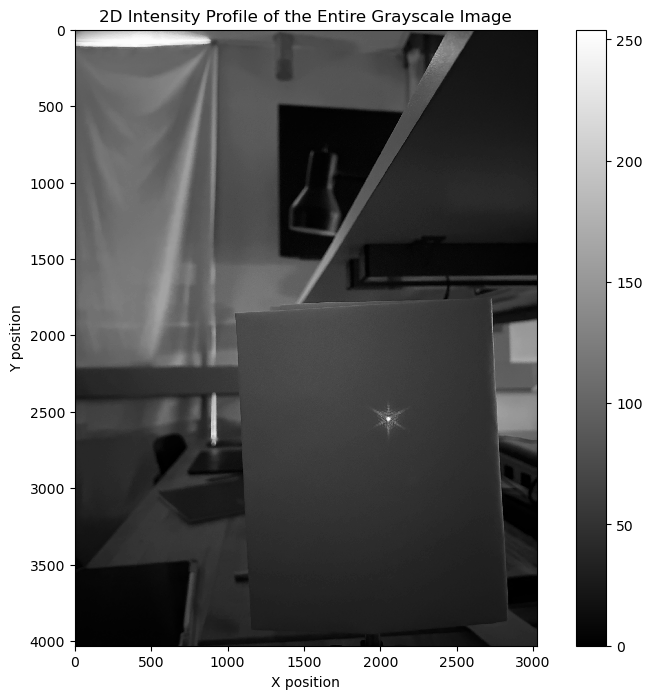

In [16]:

# Visualize the 2D intensity profile using a black and white colormap
plt.figure(figsize=(10, 8))  # Adjust size based on your display preferences
plt.imshow(gray_image, cmap='gray', interpolation='nearest')
plt.colorbar()  # Adds a color bar to help interpret the intensity values
plt.title('2D Intensity Profile of the Entire Grayscale Image')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()

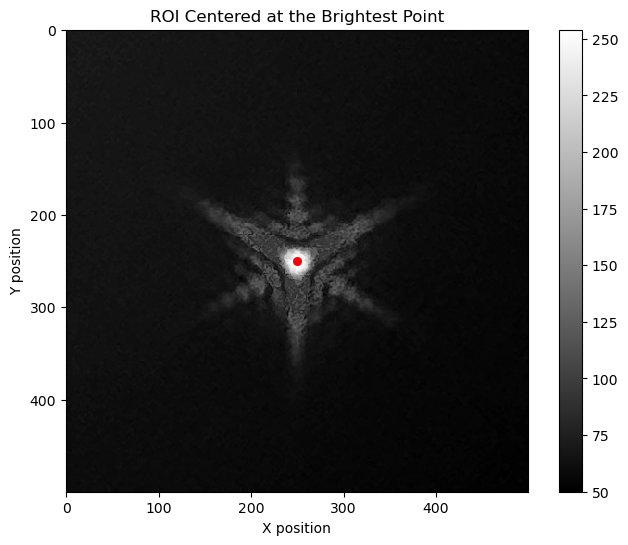

In [17]:
plt.figure(figsize=(8, 6))
plt.imshow(roi, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.scatter(roi_width // 2, roi_height // 2, c='red', s=30)  # Mark the brightest point
plt.title('ROI Centered at the Brightest Point')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.show()